# 1. Introduction 

This is a dataset that contains car accidents countrywide, covering 49 states within the USA. This data has been collected from February 2016 to December 2021 through the use of multiple APIs that collect streaming traffic incident data, from government or state departments of transportation, private data providers, enforcement agencies, traffic cameras, and traffic sensors that are utilized through the road-networks. This dataset contains currently about 2.8 million recorded observations, so it is a very large dataset to manage and manipulate. 


The dataset in this project is retrieved from Kaggle at https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

# Our Main Question: What has been the current trend of yearly car accidents? What are we able to determine from this dataset?

The main purpose of analyzing the data within this dataset, is to first fully understand what is going on. Questions that we can see in doing this are: 

- What is the current trend of yearly car accidents?

- What is the percentage of accident occurances during the day? How about during the night?

- What are the top cities with the most accidents within the US?

- What times are accidents most likely to occur within a day? What about weekly? Yearly?

- What time during the season/month are accidents highest?

I can already hypothesize with a couple things, such as the trend of yearly car accidents will go up. Accidents will occur in a time where everybody is out, such as the summer. Major cities with a larger population are more likely to have more vehicle accidents. 

In [256]:
# Importing of packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm


# For ML 
import sklearn

# For KNN model
from sklearn.neighbors import KNeighborsClassifier

# For Logistic Regression
from sklearn.linear_model import LogisticRegression


from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [257]:
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [258]:
len(df)  # Approximately around 2.8 million observations of recorded traffic accidents from 2016-2021. 

2845342

In [259]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [260]:
df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [261]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [263]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [264]:
# Missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

<AxesSubplot:>

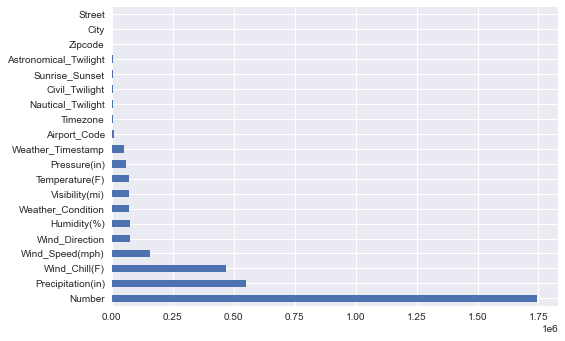

In [265]:
missing_values[missing_values !=0].plot(kind="barh")

Looking at our observational values above, these are the number of values missing (NA). So for certain variables such as the 'Number', we will not work with as there is a lot of omitted bias in the data. 
- Reporting of missing vehicle data is common for certain variables as they don't matter much to us, but overall a lot of our data is pretty accurate.
- We will create a variable with the omitted NA values, called 'moddf'

In [266]:
moddf = df.fillna(" ")

In [267]:
moddf.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [268]:
moddf.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02


In [269]:
len(moddf)

2845342

In [270]:
len(df)

2845342

- There isn't much of a difference in using either or, however we should be mindful of the certain variables that may have misinformation, such as 'Number' and 'Precipitation'. Nonetheless, it is still workable, as we have a lot of accurate results 

# 2. Descriptive Statistical Analysis

# Question: What are the top 15 cities with the most accidents?

In [271]:
moddf.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [272]:
cities = moddf.City.unique()
len(cities)

11682

In [273]:
counties = moddf.County.unique()
len(counties)

1707

In [274]:
county_accidents = moddf.County.value_counts()
county_accidents

Los Angeles            234122
Miami-Dade             143939
Orange                 114917
San Bernardino          55018
Dallas                  50050
                        ...  
Kearney                     1
Matagorda                   1
Oglala Lakota               1
St John The Baptist         1
Ness                        1
Name: County, Length: 1707, dtype: int64

In [275]:
city_accidents = moddf.City.value_counts()
city_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Horntown                             1
Crooksville                          1
Novinger                             1
Trementina                           1
American Fork-Pleasant Grove         1
Name: City, Length: 11682, dtype: int64

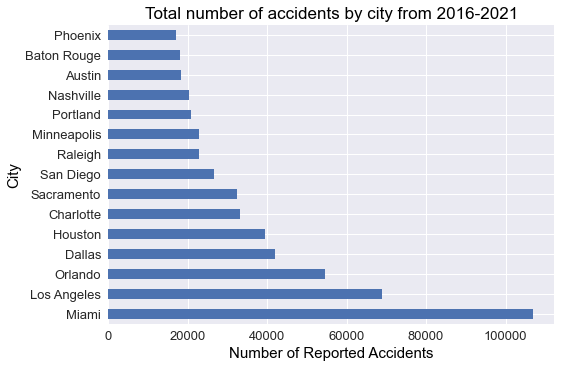

In [276]:
city_accidents[:15].plot(kind='barh')
plt.title('Total number of accidents by city from 2016-2021',size=17, color='black')
plt.xlabel('Number of Reported Accidents', fontsize=15, color='black')
plt.ylabel('City', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

- The most popular cities are the ones with the most # of accidents. 

# When do accidents moslty occur during the day? What about during the week?

In [277]:
start_time = pd.to_datetime(moddf.Start_Time)
start_time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [278]:
end_time = pd.to_datetime(moddf.End_Time)
end_time

0         2016-02-08 06:37:08
1         2016-02-08 11:56:20
2         2016-02-08 12:15:39
3         2016-02-08 12:51:45
4         2016-02-08 13:53:43
                  ...        
2845337   2019-08-23 18:32:01
2845338   2019-08-23 19:38:23
2845339   2019-08-23 19:28:49
2845340   2019-08-23 19:29:42
2845341   2019-08-23 19:21:31
Name: End_Time, Length: 2845342, dtype: datetime64[ns]

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

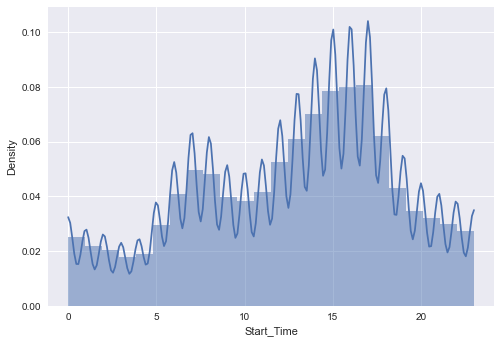

In [279]:
sns.histplot(start_time.dt.hour, bins=24, kde=True, stat="density", linewidth=0) # By the day

 - Here in this case, most accidents occur around 3pm-6pm, typically during rush hour.

<AxesSubplot:xlabel='week', ylabel='Density'>

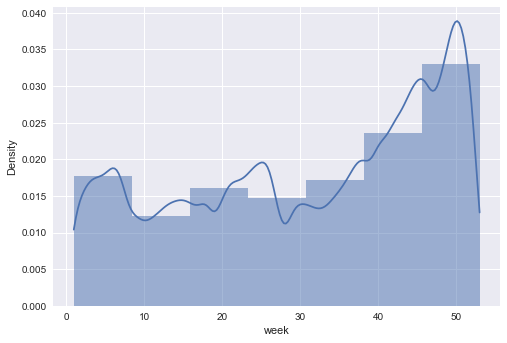

In [280]:
sns.histplot(start_time.dt.isocalendar().week, bins=7, kde=True, stat="density", linewidth=0) # By the week

- Accidents are higher around the end of the year approaching the holidays.  

## What is the percentage of accidents that occur during the day? What about the night? Twilight?

In [281]:
Accident_Day = sum(df.Sunrise_Sunset == "Day")
Accident_Day  # More accidents during the day, which makes sense of course.

1811935

In [282]:
day_twilight = sum((df.Nautical_Twilight == "Day") | (df.Civil_Twilight == "Day") | (df.Astronomical_Twilight== "Day"))
day_twilight  # 70 percent at day

2179148

In [283]:
Accident_Night = sum(df.Sunrise_Sunset == "Night")
Accident_Night # 36 percent at night

1030540

In [284]:
night_twilight = sum((df.Nautical_Twilight == "Night") | (df.Civil_Twilight == "Night") | (df.Astronomical_Twilight== "Night"))
night_twilight  # 30 percent at night 

915382

In [285]:
total = Accident_Day + Accident_Night
total

2842475

In [286]:
total2 = day_twilight + night_twilight
total2

3094530

Couple things to mention:

- 36% of car accidents occur at night! Especially when there is a reduction in drivers during this time.

- Most accidents occur between the times of 3pm-6pm, typically around rush time.

- 75% of our accidents reported no precipitation. Therefore, rain is not typically a problem.

- More than 75% of our accidents had a severity rating of ~2.0, so traffic wasn't affected

- 75% of our accidents occured with a temperature at 76 degrees Fahrenheit / 24.4 Celsius.

- So in this case, most of our accidents occured in warm weather (spring/summer) time. We can tell through the temperature and humidity percentage (83% for 75% of accidents).


In [287]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


# What is the yearly trend of accidents occuring?

In [288]:
yearly = pd.DataFrame(start_time.dt.year.value_counts()).reset_index().rename(columns={"index": "Year","Start_Time" :"Accident_Cases"})
yearly

,Year,Accident_Cases
0,2021,1511745
1,2020,625864
2,2019,258615
3,2017,163918
4,2018,163176
5,2016,122024


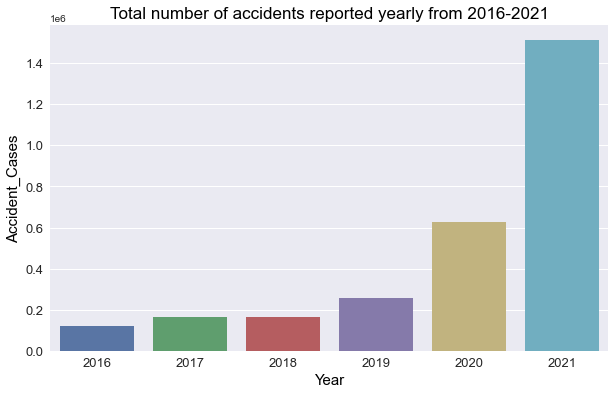

In [289]:
plt.figure(figsize=(10,6))
plt.title('Total number of accidents reported yearly from 2016-2021',size=17, color='black')
plt.xlabel('Year', fontsize=15, color='black')
plt.ylabel('Accident Cases', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

t = sns.barplot(x=yearly.Year, y = yearly.Accident_Cases)
plt.show()


Accidents have peaked ever since the emergence of COVID, and has continued to increase exponentially. 

- Reasons for this could mainly be due to the disappearance of vehicles on the road and police patrol, therefore which incentivizes people to travel at greater speeds due to no traffic being present. This makes total sense as to why traffic wasn't affected, because there was no traffic to begin with! This was a time people were mainly working from home, virtually attending classes, or simply just prefering to stay indoors. A lot of businesses, sporting events, restaurants, were not operating as well so nobody travelled anywhere.

- However, it is surprising to see such a surge. 

In [290]:
states = df.State.value_counts()
states

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

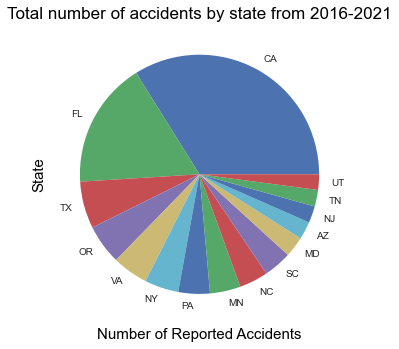

In [291]:
states[:15].plot(kind='pie')
plt.title('Total number of accidents by state from 2016-2021',size=17, color='black')
plt.xlabel('Number of Reported Accidents', fontsize=15, color='black')
plt.ylabel('State', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

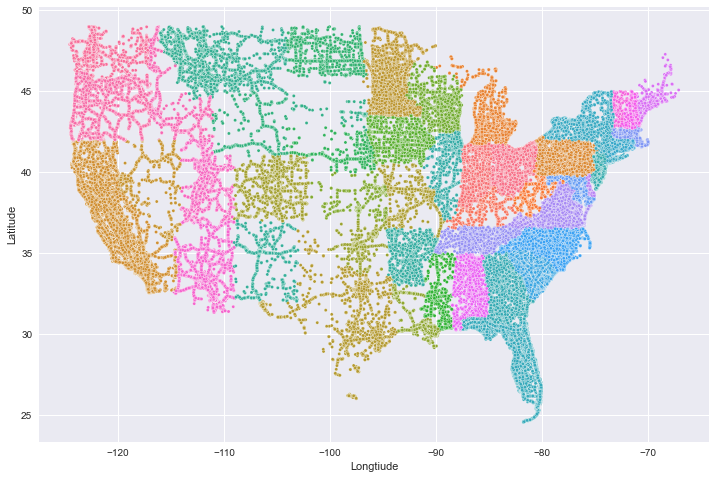

In [292]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue="State", data=df, s=10, legend=False)
plt.xlabel("Longtiude")
plt.ylabel("Latitude")
plt.show()

California and Florida are the leading states with the most traffic accidents. 

Text(0.5, 1.0, 'Degree of Severity')

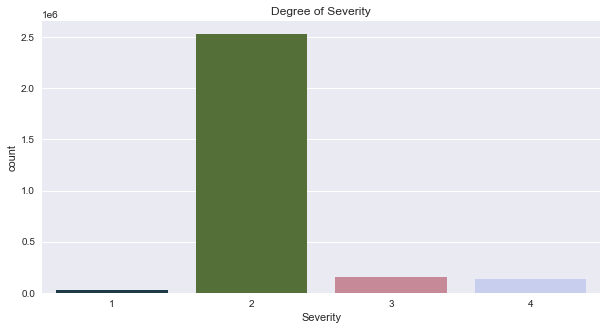

In [293]:
fig, ax = plt.subplots(figsize = (10,5))
sev = sns.countplot(x="Severity", data=df, palette = "cubehelix")
sev.set_title("Degree of Severity")

The degree of severity represents the type of accident. It usually is listed as:
- 1. Not visible but complaints of pain (least affects traffic).
- 2. Non-incapicating / Minor injuries
- 3. Incapacitating / Major injuries
- 4. Fatal (affects traffic the most).

Incapicating usually means that you are given help when the accident occurs, through means of an ambulance, police, and firefighters.

# 3. Statistical Inference: Machine Learning

A model will be constructed that is capable of predicting the severity of car accidents within that city and state.

- This can be accomplished through ML classifying algorithms. Models that will be introduced to predict the outcome are through the means of **Logistic Regressional Analysis** and **KNN (K-Nearest-Neighbors).**

- Due to the immense data set, we will look at one city within a state. It will be Hartford, CT. 

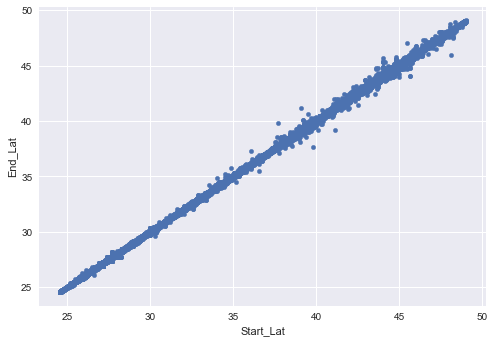

In [294]:
plt.style.use('seaborn')

df.plot(x = 'Start_Lat', y='End_Lat',kind='scatter')
plt.show()

Our starting and ending latitudes show a positive correlation. This is merely a test to see how our data functions.

In [295]:
# Convert Start_Time and End_Time into dataframe.
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Categories of time
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
time_d='Time_Duration(min)'
df[time_d]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))


# To see if any outliers
df[time_d][df[time_d]<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In order to prevent any infinite or NaN values from disrupting our model, we will implement the use of outliers using median values. 

In [296]:
n=3

median = df[time_d].median()
std = df[time_d].std()
outliers = (df[time_d] - median).abs() > std*n

df[outliers] = np.nan

# Include NA 
df[time_d].fillna(median, inplace=True)

Due to the sheer size of the data, there is no need to overfit the model as we have a lot of it. So no need to use tools such as data augmentation or dropout methods. 
- Here below are the variables that we will put within our model.

In [297]:
ML_List = ['ID','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State',
               'Timezone','Temperature(F)',
               'Humidity(%)','Pressure(in)', 
               'Visibility(mi)', 'Wind_Direction',
               'Weather_Condition','Amenity',
               'Bump','Crossing','Give_Way',
                'Junction','No_Exit',
               'Railway','Roundabout','Station','Stop','Traffic_Calming',
               'Traffic_Signal',
               'Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [298]:
df_ml = df[ML_List].copy()         

In [299]:
df_ml.isnull().mean()

ID                    0.000558
Severity              0.000558
Start_Lng             0.000558
Start_Lat             0.000558
Distance(mi)          0.000558
Side                  0.000558
City                  0.000606
County                0.000558
State                 0.000558
Timezone              0.001843
Temperature(F)        0.024878
Humidity(%)           0.026220
Pressure(in)          0.021353
Visibility(mi)        0.025324
Wind_Direction        0.026458
Weather_Condition     0.025356
Amenity               0.000558
Bump                  0.000558
Crossing              0.000558
Give_Way              0.000558
Junction              0.000558
No_Exit               0.000558
Railway               0.000558
Roundabout            0.000558
Station               0.000558
Stop                  0.000558
Traffic_Calming       0.000558
Traffic_Signal        0.000558
Turning_Loop          0.000558
Sunrise_Sunset        0.001565
Hour                  0.000558
Weekday               0.000558
Time_Dur

Now that we have our values, we can choose which specific data that we want to pull. 

In [300]:
state = 'CT'

select_state = df_ml.loc[df_ml.State==state].copy()
select_state.drop('State', axis=1, inplace=True)
select_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29759 entries, 31581 to 2844969
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  29759 non-null  object 
 1   Severity            29759 non-null  float64
 2   Start_Lng           29759 non-null  float64
 3   Start_Lat           29759 non-null  float64
 4   Distance(mi)        29759 non-null  float64
 5   Side                29759 non-null  object 
 6   City                29759 non-null  object 
 7   County              29759 non-null  object 
 8   Timezone            29759 non-null  object 
 9   Temperature(F)      29636 non-null  float64
 10  Humidity(%)         29576 non-null  float64
 11  Pressure(in)        29690 non-null  float64
 12  Visibility(mi)      29660 non-null  float64
 13  Wind_Direction      29552 non-null  object 
 14  Weather_Condition   29634 non-null  object 
 15  Amenity             29759 non-null  object 
 16

In [301]:
city = 'Hartford'

select_city = df_ml.loc[df_ml.City==city].copy()
select_city.drop('City', axis=1, inplace=True)
select_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 24509 to 2844966
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2875 non-null   object 
 1   Severity            2875 non-null   float64
 2   Start_Lng           2875 non-null   float64
 3   Start_Lat           2875 non-null   float64
 4   Distance(mi)        2875 non-null   float64
 5   Side                2875 non-null   object 
 6   County              2875 non-null   object 
 7   State               2875 non-null   object 
 8   Timezone            2875 non-null   object 
 9   Temperature(F)      2868 non-null   float64
 10  Humidity(%)         2868 non-null   float64
 11  Pressure(in)        2870 non-null   float64
 12  Visibility(mi)      2870 non-null   float64
 13  Wind_Direction      2870 non-null   object 
 14  Weather_Condition   2870 non-null   object 
 15  Amenity             2875 non-null   object 
 16 

Conversion of our data into a dummy variable, where we manipulate the data to be distinguishable before putting into our model.

In [302]:
df_city_dummy = pd.get_dummies(select_city,drop_first=True)
df_city_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 24509 to 2844966
Columns: 2968 entries, Severity to Weekday_Wed
dtypes: float64(10), uint8(2958)
memory usage: 8.4 MB


In [303]:
df_ml.dropna(subset=df_ml.columns[df_ml.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_ml.shape

(2732152, 33)

This will be the shape of our model. Now we can assign the data and create two seperate data sets, our training and testing. 

In [304]:
# Here we assign our dataframe we started with to the dummy variable we will be using. 
df=df_city_dummy

# Our target will be the severity of car accidents
target='Severity'


y = df[target] 
X = df.drop(target, axis=1)  
X = np.nan_to_num(X)  # NaN to numeric value 


# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [305]:
accuracy = []

# Logistic Regression

In [306]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

acc = accuracy_score(y_test,y_pred)

accuracy.append(acc)

/Users/omaral-shammary/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN (K-Nearest-Neighbors)

In [307]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over values of n_neighbor(k)  # change n_neighbor to k 
for i, k in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)



# Final Fitted Models of Logistic Regression and KNN (K-Nearest Neighbors)

In [308]:
print("The accuracy percentage of our Logistic Regression algorithm is {:.3f}.".format(acc))

The accuracy percentage of our Logistic Regression algorithm is 0.878.


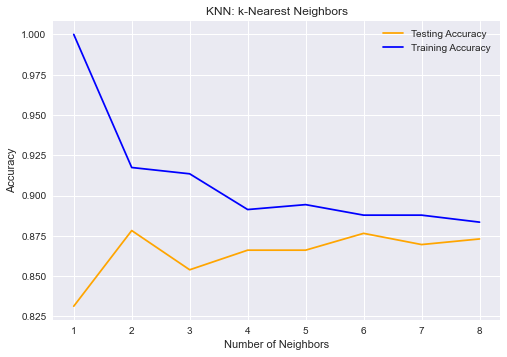

In [309]:
plt.title('KNN: k-Nearest Neighbors')
plt.plot(neighbors, test_accuracy, color= "orange", label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, color="blue", label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Looking at our KNN modeled graph, it is following an accuracy percentage of around 88 percent, which is very great for a model. Both out testing and training accuracy show very fitting results, as they both are following similar patterns together, meaning they correlate with one another. We can also disclose that there is no overfitting whatsoever, but this is given since we are working with 2.8 million observations!

# Conclusion 

##### What has been the current trend of yearly car accidents? What are we able to determine from this dataset?

As seen within the Logistic Regression and KNN, we can confidently say that this model can accuractely predict the severity of a car accident. The **severity** of a accident **(our Y)** is dependent on all the other independent variables **(our X)** that are given within this dataset, such as the time, date, distance, latitude, temperature, humidity, and so on. More serious severities that account for incapacitating or fatal accidents, can usually mean a longer time, traffic that reaches out a farther distance, to the type of weather or season that was present during that accident.

<u> Therefore, we can conclude that throughout our data exploratory analysis, that traffic accidents within the US have been getting much worse.</u> Not only has the severity of accidents increased within the past couple of years, but that simply alone a surge occuring especially during a time where a pandemic had just begun, meaning that more accidents occurred with fewer drivers on the road. 75% of all traffic accidents recorded within this dataset had a severity level of 2, which means that the people affected were incapacitated (needed help getting out of the accident) and had minor injuries. Solving the issue of reducing traffic accidents can relieve pressure on not only the drivers, but everybody overall.


Fitting the KNN algorithm simply tells us how close both our testing and training variables compare with one another, hence the neighbor within the name. Using this model adds depth to the analysis as it shows us the simiarlites of both our X and Y. Through this neural network we are able to predict what type of accidents can occur and how. For example, percipitation of rain had no affect whatsoever on the traffic accidents that occured within our dataset, yet it would be thought that this would actually be a main factor. 

The Logistic Regression shows a similar followthrough and is way faster than a neural network, however it can only support linear solutions, whereas our KNN model can take in nonlinear solutions. Overall, machine learning is such a wonderful tool that not only figures out the probability of a given/discrete outcome, but also does it so wonderfully and graphically. 

 


# References

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.